# Faltung
<a id="SubSec-white_box"></a>

In diesem Abschnitt wollen wir uns der Genialität der Impulsantwort in Kombination mit der Faltung widmen. 
Hierfür müssen wir uns zuerst angucken, was *Faltung* überhaupt bedeutet. Wie schon im vorherigen Kapitel angedeutet, ist die *Faltung* eine Operation, die es erlaubt das Ausgangssignal im Frequenzbereich vorherzusagen, in dem die Eingangsfunktion mit der Systemantwort (Übertragungsfunktion) *gefaltet* wird:

$$Y(s) = G(s) \cdot U(s)$$

Die Faltung im Frequenzraum ist also eine einfache Multiplikation. 

## Faltung im Zeitraum
<a id="SubSubSec-Impulsantwort_und_Faltung"></a>

Die **Faltung** ist eine mathematische Operation, welche zwischen zwei Funktionen $f$ und $g$ ausgeführt werden kann. Die Kurzschreibweise ist das Sternchen zwischen den beiden Funktionen. Allgemein berechnet wird sie über ein Integral, welches die beiden Funktionen beinhaltet, wobei $g$ hierbei zeitlich gespiegelt und verschoben wird. 

$$(f \ast g)(t) = \int_{-\infty}^{\infty} f(\tau)g(t-\tau) \mathrm{d}\tau$$

Die resultierende „Überlagerung“ zwischen $f$ und gespiegelten und verschobenen Versionen von $g$ (man spricht auch von einer „Verschmierung“ von $f$) kann z. B. verwendet werden, um einen gleitenden Durchschnitt zu bilden.
Das Faltungsintegral kann in drei Schritten verstanden werden:

1. der Eingang $g$ wird in der Zeit umgekehrt and zeitverschoben
2. Dieses umgekehrte und verschobene $g$ wird nun an $f$ multipliziert
3. Und dann wird das Produkt über alle Zeiten summiert (Integralbildung).

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
FALTUNG – Grafische Lösung | Signaltheorie

<iframe width="220" height="113" src="https://www.youtube.com/embed/ogSd3rbn-ks?si=U2Z-pBRgh3XSpwMn" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::

In folgender Animation ist die Faltung von zwei Rechtecksignalen anschaulich dargestellt. Das eine Rechtecksignal wird gespiegelt (was bei einem Rechteck keinen Unterschied macht) und mit dem anderen Rechtecksignal überlagert. Die Faltung $f \ast g$ nedeutet, dass jeder Wert von $f(\tau)$ durch das mit $g$ *gewichtete Mittel*, $g(x-\tau)$, ersetzt wird. 

:::{figure-md} faltung_wikipedia
<img src="pictures/faltung_wikipedia.gif" alt="faltung_wikipedia" class="bg-primary mb-1" width="700px" label = faltung_wikipedia>

Faltung. Credit: Wikipedia
:::

Für viele Funktionen wurde das Faltungsintegral bereits bestimmt, da es sehr aufwendig ist, dieses i.Allg. zu lösen. 
Das Integral zu lösen hilft außerdem kaum dabei genau zu verstehen, was das Integral, bzw. die Faltung, an sich überhaupt bedeutet. Die Faltung kann auch grafisch bestimmt werden, was wir uns in einer Übung einmal genauer ansehen werden. 

Das heißt auch im Zeitraum können wir ein Aussgangssignal mittels Faltung vorhersagen:

$$y(t) = h(x(t)) \ast x(t)$$

## Beispiele und Anwendungen
Die resultierende Überlagerung von $f$ und den gespiegelten, verschobenen Versionen von $g$ wird benutzt, um den *gleitenden Durchschnitt* zu berechnen. Dieser wird benötigt, um Zeit- und Datenreihen zu **glätten**. Üblicherweise werden hierdurch höhere Frequenzanteile entfernt. Das heißt die Faltung entspricht einem Tiefpassfilter. Man spricht auch von einer *Verschmierung* von $f$. 

In folgenden Diagrammen sind drei Beispiele für solche Verschmierungen bzw. Glättungen dargestellt:

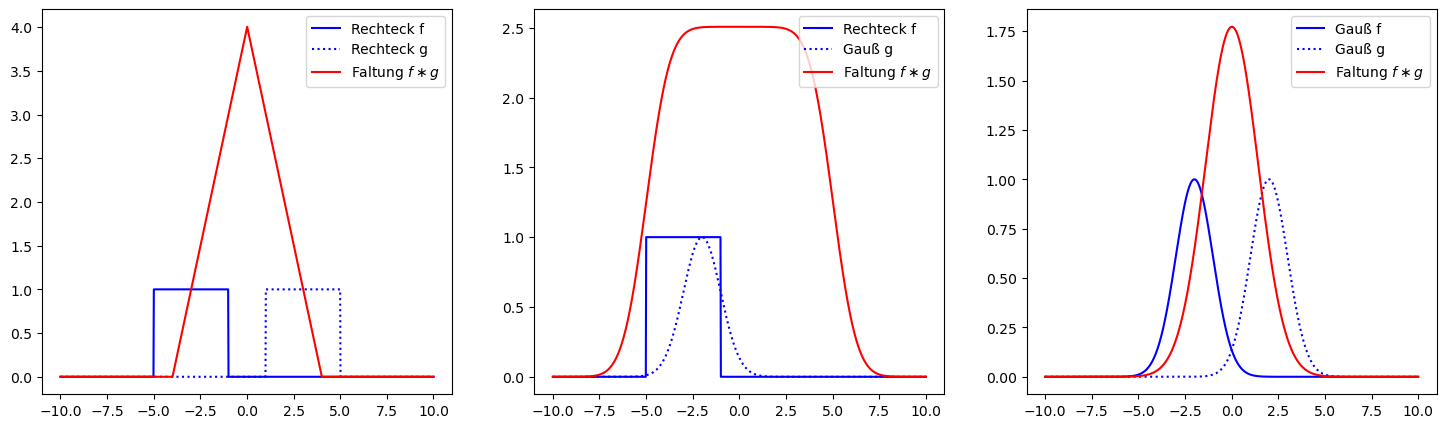

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definiere Funktionen
def rect_signal(x, center, width):
    return np.where(abs(x - center) <= width / 2, 1, 0)

def gaussian(x, mean, sigma):
    return np.exp(-((x - mean)**2) / (2 * sigma**2))

# X-Achsen-Bereich
x = np.linspace(-10, 10, 1000)

# Rechtecksignale
rect1 = rect_signal(x, -3, 4)
rect2 = rect_signal(x, 3, 4)
rect3 = rect_signal(x, 2, 10)

# Gaußsche Signale
gaussian1 = gaussian(x, -2, 1)
gaussian2 = gaussian(x, 2, 1)

# Faltungsberechnungen
conv_rect = np.convolve(rect1, rect2, mode='same') * (x[1] - x[0])
conv_rect_gauss = np.convolve(rect3, gaussian1, mode='same') * (x[1] - x[0])
conv_gauss = np.convolve(gaussian1, gaussian2, mode='same') * (x[1] - x[0])

# Erstelle Subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plotten
# Faltung zweier Rechteckfunktionen
axs[0].plot(x, rect1, label='Rechteck f', color = 'b')
axs[0].plot(x, rect2, label='Rechteck g', color = 'b', ls = ':')
axs[0].plot(x, conv_rect, label=r'Faltung $f \ast g$', color='r')
#axs[0].set_title('Faltung zweier Rechteckfunktionen')
axs[0].legend(loc = 1)

# Faltung einer Rechteck- und einer Gaußfunktion
axs[1].plot(x, rect1, label='Rechteck f', color = 'b')
axs[1].plot(x, gaussian1, label='Gauß g' , color = 'b', ls = ':')
axs[1].plot(x, conv_rect_gauss, label=r'Faltung $f \ast g$', color='r')
#axs[1].set_title('Faltung einer Rechteck- und einer Gaußfunktion')
axs[1].legend(loc = 1)

# Faltung zweier Gaußfunktionen
axs[2].plot(x, gaussian1, label='Gauß f', color = 'b')
axs[2].plot(x, gaussian2, label='Gauß g', color = 'b', ls = ':')
axs[2].plot(x, conv_gauss, label=r'Faltung $f \ast g$', color='r')
#axs[2].set_title('Faltung zweier Gaußfunktionen')
axs[2].legend(loc = 1)

# Zeige den Plot
plt.show()


Interessant ist hierbei, dass die Faltung einer Normalverteilung ($\mu_1, \sigma_1$) mit einer zweiten Normalverteilung ($\mu_2, \sigma_2$) wieder eine Normalverteilung ergibt, mit dem Mittelwert 

$$\mu = \mu_1 + \mu_2$$

und der Standardabweichung

$$\sigma =\sqrt{\sigma_1^2 + \sigma_2^2}$$

Diesen Zusammenhang kennen wir bereits, nämlich als [Gauß'sche Fehlerfortpflanzung](1_Fehlerfortpflanzung.ipynb). Stell dir vor, wir haben zwei Stäbe gemessen, deren Längenmessung fehlerbehaftet ist. Der erste Stab misst $ L_{1}=\left(1\pm 0{,}03\right)\,\mathrm {m}$, der zweite Stab misst $ L_{2}=\left(2\pm 0{,}04\right)\,\mathrm {m}$. Nun setzt man die beiden Stäbe zusammen und möchte wissen, wie lang dieser ist inkl. Fehlerabschätzung. Dann berechnet man zunächst die Gesamtlänge über den Mittelwert $L = \overline L_1 + \overline L_2 = 1\,\mathrm m + 2\,\mathrm m = 3\,\mathrm m$. Die Unsicherheit nach Gauß beträgt $\sigma = \sqrt{(0{,}03\,\mathrm m)^2 + (0{,}04\,\mathrm m)^2} = 0{,}05\,\mathrm m$.
Sowohl die Einzelmessungen von Stab 1 und Stab 2 waren normalverteilt, und genauso wieder die Längenmessung des zusammengestezten Stabes.  

**Anwendung** findet die Faltung 
* in der Bildbearbeitung um Rauschen zu vermindern oder Kanten zu extrahieren
* in der Systemtheorie um Antworten von Messsysteme vorherzusagen: Durch die Faltung der Anregungsfunktion mit der Impulsantwort bekommt man die zu erwartende Antwort eines Messsystems. 
* um die spezielle Lösung von bestimmten partiellen Differentialgleichung zu finden.
* in der Akustik um Hall und Echos und andere Klangeigenschaften anzupassen. Hier wird ebenfalls die Impulsantwort eines Raums, dessen Klangcharakteristik man übernehmen möchte, mit dem Signal gefaltet, dass man beeinflussen möchte. 
* in der Ingenieurmathematik und der Signalverarbeitung
* uvm.

## Faltung vs. Korrelation vs. Autokorrelation

Die Faltung ist nicht zu verwechseln mit der Kross-Korrelation von zwei Messsignalen. Obwohl die Integrale sehr ähnlich aussehen, so besteht ein signifikanter Unterschied zwischen diesen beiden Methoden, der sich im Minuszeichen der Verzögerung aufzeigt. Grafisch bedeutet dies, dass das zu faltende Signal im Falle der Kreuz-Korrelation *nicht* gespiegelt wird, wohingegen es bei der grafischen Faltung zeitlich gespiegelt werden muss. 
Die **Faltung** berechnet man in der Regel, wenn man die Antwort eines Messsystems berechnen möchte.

$$(f \ast g)(t) = \int_{-\infty}^{\infty} f(\tau)g(t-\tau) \mathrm{d}\tau$$

Die **Kreuz-Korrelation** berechnet man um zu untersuchen, ob Rauschanteile von Signal $f$ auch in Signal $g$ vorkommen (Stichwort ist hier der *Korrelationsbegriff*, welcher häufig auf zwei *Signale* und nicht Messsysteme angewendet wird).

$$(f \star g)(t) = \int_{-\infty}^{\infty} f(\tau)g(t+\tau) \mathrm{d}\tau$$

Die **Auto-Korrelation** soll hier der vollständigkeitshalber noch einmal als Spezialfall der Kreuz-Korrelation aufgeführt werden. Hier berechnet man, wie ähnlich ein zeit-verschobenes Signal zu sich selbst ist (*zeitliche Korrelation*). 

$$(g \star g)(t) = \int_{-\infty}^{\infty} g(\tau)g(t+\tau) \mathrm{d}\tau$$

:::{figure-md} faltung_korr_auto
<img src="draw/faltung_korr_auto.jpg" alt="faltung_korr_auto" class="bg-primary mb-1" width="700px" label = faltung_korr_auto>

Vergleich von Faltung, Korrelation und Autokorrelation.
:::


## Faltung von Impulsen

Das interessante der Faltung ist jedoch, dass wir durch diese mathematische Operation das Systemverhalten oder Ausgangssignale vorhersagen können, solange die Impulsantwort bekannt ist. Man kann sich das vereinfacht so vorstellen, dass eine beliebige Eingangsfunktion $f(t)$ durch undendliche viele *Impulse* beschrieben werden, mit infinitesimal kleiner Breite $dt$. Die Impulsantwort ist für einen Impuls (Delta-Peak) bekannt: sie ist die zeitverschobene Antwort $g(t-dt)$. Die Überlagerung vieler einzelner Impulse, eine beliebige Eingangsfunktion $f(t)$ zu modellieren, ist einfach die Aussummerierung aller Impulse. In einem LZI System ist die Impulsantwort ebenfalls die Aufsummerierung der Impulsantworten zu den zugehörigen Impulsen (*Linearitätsbedingung*). 
Um den *realen* Werteverlauf der Eingangsfunktion sicher zu stellen, muss jeder Delta-Peak für jedes Zeitintervall mit dem Funktionswert skaliert werden.
Die *Homogenitätsbedingung* stellt jetzt sicher, dass wir den Ausgang auch entsprechend skalieren dürfen. 
Mathematisch betrachtet resultiert dies direkt darin, dass wir Antworten von beliebigen Anregungsfunktionen hervorsagen können, indem die Anregungsfunktion $f(t)$ mit der Impulsantwort gefaltet wird. 

![Bild](pictures/faltung_zeit.png)


## Zusammenfassung
<a id="Sec-Zusammenfassung"></a>

Im folgenden Bild ist zusammengefasst, welche Trick und Tips man sich im Frequenzraum von Nutzen machen kann, solange es sich um ein LZI System handelt!

* Mittels Fourier-Transformation kann ich jederzeit in den Frequenzraum wechseln und mittels Rücktransformation zurück gehen. Egal ob es sich um ein Signal oder ein System (hier wird häufig der Laplace-Raum verwendet) handelt.
* Die Ableitung der Sprunganregung ist eine Dirca-Funktion (Impulsanregung). Die Ableitung der Sprung*antwort* ergibt die Impuls*antwort*. Dies gilt sowohl im Zeit- wie auch im Frequenzraum. (*Frage: Was sieht die zeitliche Ableitung der Fourier-Transformierten 1/s?)
* Lösen von DGLs im Laplace-Raum ist eine algebraische Umformung der Gleichung
* Lösen von DGLs im Zeitraum benötigt einen Lösungsansatz, eine homogene Lösung, eine spezielle Lösung und verschiedene Schritte inkl. Anfangsbedingungen um die Lösung zu finden.
* Die Faltung im Laplace-Raum ist eine Multiplkation
* Die Faltung im Zeitraum ist ein Integral
* Die Faltung ist generell ein hilfreiches Werkzeug um...
    * Systeme hintereinanderzuschalten und die Gesamt-Übertragungsfunktion zu berechnen (Faltung der beiden Systeme berechnen)
    * Die Antwort auf ein beliebiges Eingangssignal mittels Impulsantwort zu bestimmten (Faltung von beliebigem Eingangssignal mit Impulsantwort liefert Antwort des Systems auf das beliebige Eingangssignal)
    * Die Faltung hilft bei allen drei Problemen: System-Indentifizierungsproblem, Simulationsproblem und Kontrollproblem
    
![Bild](pictures/t_s_draw.jpg)